# TASK 3

CAR PRICE PREDICTION WITH MACHINE LEARNING

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [17]:
#load dataset
df = pd.read_csv(r"C:\Users\Admin\Downloads\car data.csv")

In [18]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [19]:
df.shape

(301, 9)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [21]:
#numerical stats
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [22]:
#missing values
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

### Data Preprocessing

In [23]:
df['Age'] = 2020 - df['Year']
df.drop('Year',axis=1,inplace = True)

In [24]:
df.rename(columns = {'Selling_Price':'Selling_Price(lacs)','Present_Price':'Present_Price(lacs)','Owner':'Past_Owners'},inplace = True)

### Exploratory Data Analysis (EDA)

#### Univariate Analysis

In [25]:
df.columns

Index(['Car_Name', 'Selling_Price(lacs)', 'Present_Price(lacs)', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Past_Owners', 'Age'],
      dtype='object')

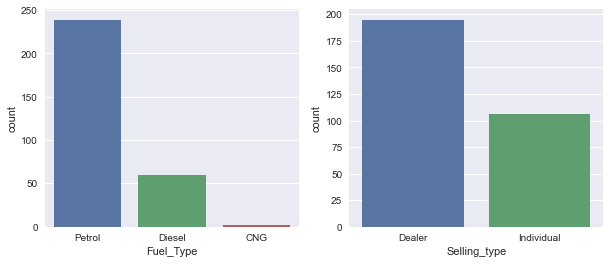

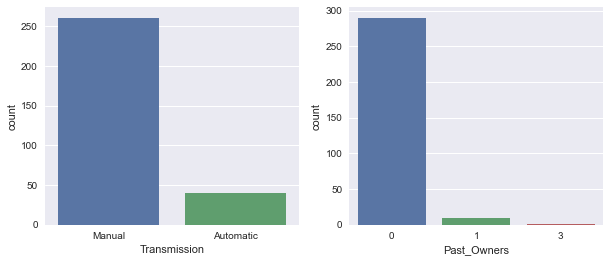

In [26]:
cat_cols = ['Fuel_Type','Selling_type','Transmission','Past_Owners']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(cat_cols[i])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    #ax2.title.set_text(cat_cols[i])
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.show()

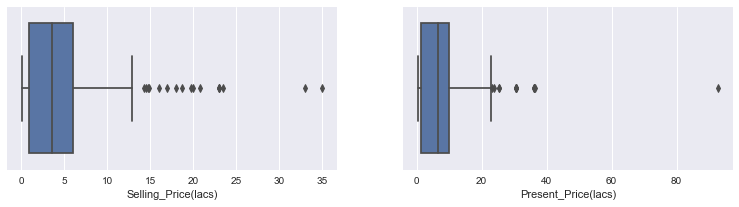

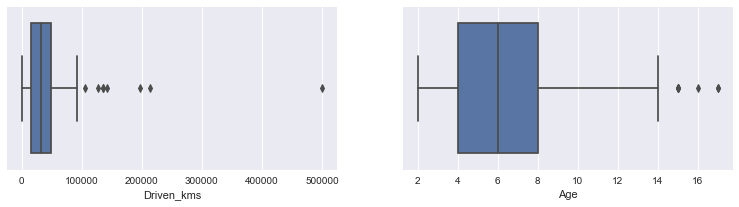

In [28]:
num_cols = ['Selling_Price(lacs)','Present_Price(lacs)','Driven_kms','Age']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    plt.show()

In [29]:
df[df['Present_Price(lacs)'] > df['Present_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Driven_kms,Fuel_Type,Selling_type,Transmission,Past_Owners,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,3
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,10


In [30]:
df[df['Selling_Price(lacs)'] > df['Selling_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Driven_kms,Fuel_Type,Selling_type,Transmission,Past_Owners,Age
63,fortuner,23.5,35.96,47000,Diesel,Dealer,Automatic,0,5
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,3
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,10


In [32]:
df[df['Driven_kms'] > df['Driven_kms'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Driven_kms,Fuel_Type,Selling_type,Transmission,Past_Owners,Age
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,15
179,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0,10
196,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0,12


#### Bivariate/Multi-Variate Analysis

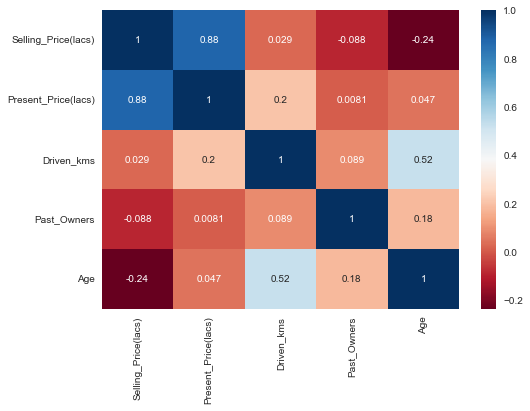

In [33]:
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

In [34]:
df.corr()['Selling_Price(lacs)']

Selling_Price(lacs)    1.000000
Present_Price(lacs)    0.878914
Driven_kms             0.029187
Past_Owners           -0.088344
Age                   -0.236141
Name: Selling_Price(lacs), dtype: float64

In [36]:
df.pivot_table(values='Selling_Price(lacs)', index = 'Selling_type', columns= 'Transmission')

Transmission,Automatic,Manual
Selling_type,,
Dealer,12.246552,5.756506
Individual,1.968182,0.743895


### Data Preparation

#### Creating Dummies for Categorical Features

In [37]:
df.drop(labels='Car_Name',axis= 1, inplace = True)

In [38]:
df.head()

,Selling_Price(lacs),Present_Price(lacs),Driven_kms,Fuel_Type,Selling_type,Transmission,Past_Owners,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [39]:
df = pd.get_dummies(data = df,drop_first=True) 

In [40]:
df.head()

,Selling_Price(lacs),Present_Price(lacs),Driven_kms,Past_Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


### Train-Test Split

In [44]:
# Separating target variable and its features
y = df['Selling_Price(lacs)']
X = df.drop('Selling_Price(lacs)',axis=1)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 8)
x test:  (61, 8)
y train:  (240,)
y test:  (61,)


### Model Creation/Evaluation

#### Applying regression models
1. Linear Regression 
2. Ridge Regression
3. Lasso Regression
4. Random Forest Regression
5. Gradient Boosting regression

In [47]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [48]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

#### Standard Linear Regression or Ordinary Least Squares

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.8990761  0.89776701 0.82981561 0.81795625 0.76012544]
Train CV mean : 0.84


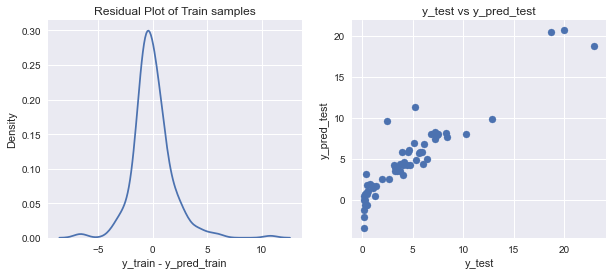

In [49]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

#### Ridge

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.89907549 0.89776963 0.82981785 0.81795858 0.75430125]
Train CV mean : 0.84


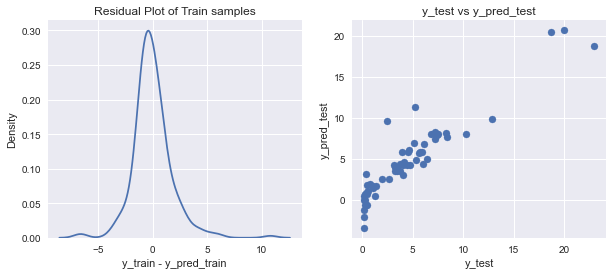

In [50]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

#### Lasso

In [51]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.89905191 0.89913326 0.83017798 0.81795538 0.70121811]
Train CV mean : 0.83


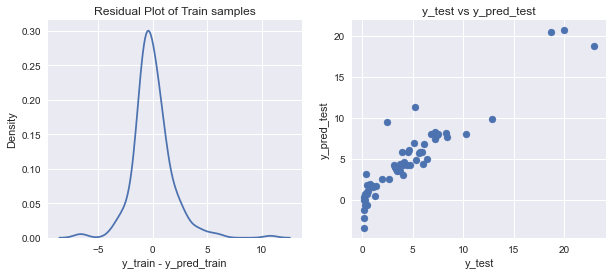

In [52]:
car_pred_model(ls_rs,"lasso.pkl")

#### Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Train R2-score : 0.98
Test R2-score : 0.87
Train CV scores : [0.88642221 0.96654522 0.80633519 0.88926226 0.73401042]
Train CV mean : 0.86


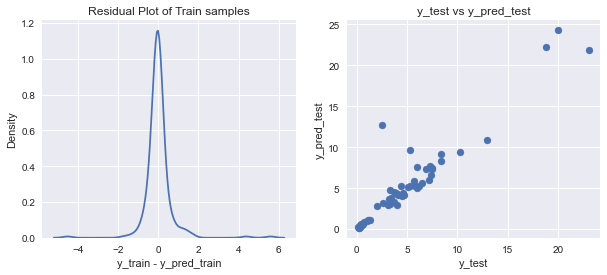

In [54]:
car_pred_model(rf_rs,'random_forest.pkl')

In [55]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=8, min_samples_split=4, n_estimators=500)


#### Gradient Boosting

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

Train R2-score : 0.97
Test R2-score : 0.79
Train CV scores : [0.92936871 0.93003644 0.88208183 0.92677612 0.66045705]
Train CV mean : 0.87


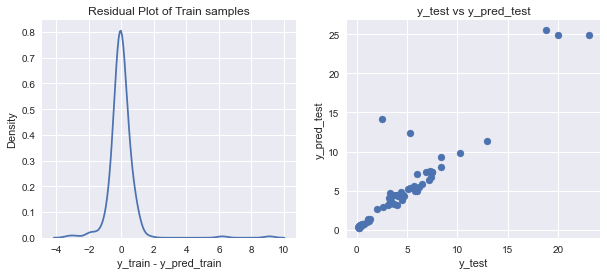

In [57]:
car_pred_model(gb_rs,"gradient_boosting.pkl")

In [58]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.88,0.86,0.84
1,Ridge,0.88,0.86,0.84
2,Lasso,0.88,0.86,0.83
3,RandomForestRegressor,0.98,0.87,0.86
4,GradientBoostingRegressor,0.97,0.79,0.87
